<a href="https://colab.research.google.com/github/micah-shull/Machine_Learning_Pipelines/blob/main/pipelines_02_pca_clustering_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Clustering

### **What is PCA Clustering?**
PCA clustering is a technique that combines **Principal Component Analysis (PCA)** and **clustering methods** (like K-Means) to group similar data points together in a lower-dimensional space. This approach is useful when working with high-dimensional datasets, as PCA helps reduce dimensionality while preserving as much variance as possible, making clustering more efficient and meaningful.

---

### **Why Use PCA for Clustering?**
1. **Dimensionality Reduction**: High-dimensional data can be challenging for clustering algorithms like K-Means because of the **curse of dimensionality**. PCA helps by reducing the number of features while maintaining the essential structure of the data.
2. **Improved Clustering Performance**: By removing noise and redundant features, PCA often leads to **better-defined clusters** and improved separation between groups.
3. **Visualization**: Clustering high-dimensional data is difficult to interpret. PCA allows you to **visualize clusters** in 2D or 3D using its principal components.
4. **Efficiency**: Fewer dimensions mean **faster computation** and **less memory usage**, making clustering algorithms like K-Means more efficient.
5. **De-correlates Features**:**Orthogonal Components**: PCA transforms features into orthogonal components, which are uncorrelated. This can help clustering algorithms like K-Means that assume clusters are spherical in shape.
- **Improves Clustering Quality**: De-correlated features can improve the quality of the clusters formed by the algorithm.

### 5. **Preprocessing for Clustering**
- **Standardization and Scaling**: PCA includes steps to standardize and scale the data, which are important preprocessing steps for many clustering algorithms.
- **Consistent Preprocessing**: Using PCA ensures that data is preprocessed consistently before clustering, leading to more reliable results.

---

### **How Does PCA Clustering Work?**
1. **Preprocess the Data**:
   - Standardize numeric features to ensure equal scaling.
   - Encode categorical variables using One-Hot Encoding.
   - Handle missing values appropriately.
2. **Apply PCA**:
   - Reduce the dataset to a lower-dimensional space by selecting the top principal components.
   - PCA transforms the original features into **uncorrelated** principal components ordered by variance.
3. **Cluster in the PCA Space**:
   - Apply **K-Means clustering** (or another clustering algorithm) to the PCA-transformed data.
   - Assign cluster labels to each data point.
4. **Evaluate the Clustering**:
   - Compute a **Silhouette Score** to assess how well-separated the clusters are.
   - Visualize the clusters using the first two PCA components.

---

### **Interpreting the Results**
1. **Silhouette Score**:
   - Measures how well clusters are separated.
   - Values range from -1 to 1:
     - **Close to 1**: Well-separated clusters.
     - **Close to 0**: Overlapping clusters.
     - **Negative**: Incorrect clustering (some points are assigned to the wrong cluster).

2. **Cluster Visualization**:
   - The scatter plot helps **identify patterns** in the clusters.
   - Different colors represent **different cluster assignments**.

---

### **When to Use PCA Clustering?**
✅ **High-Dimensional Data**: When you have many features and need to simplify them.  
✅ **Reducing Noise**: If raw features contain a lot of redundant or noisy data.  
✅ **Computational Efficiency**: PCA speeds up clustering when working with large datasets.  
✅ **Better Cluster Separation**: If K-Means performs poorly on the original dataset, PCA can help by reducing feature correlation.

---

### **Next Steps**
- **Try Different PCA Components**: Experiment with different values of `n_components` to find the optimal dimensionality.
- **Test Different Clustering Methods**: K-Means is common, but other clustering methods (like DBSCAN or Hierarchical Clustering) might work better.
- **Interpret PCA Components**: Check the explained variance ratio (`pca.explained_variance_ratio_`) to understand how much information each component captures.
- **Feature Engineering**: Some categorical variables might be more meaningful if grouped differently before PCA.






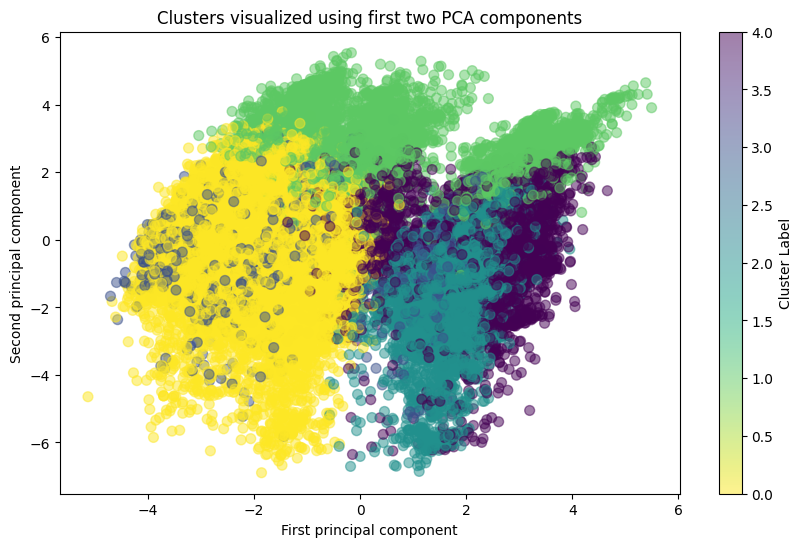

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Ensure all features are standardized after encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler())  # Standardizing categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA and K-Means
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline
pipeline.fit(X)

# Extract the PCA and K-Means steps
pca = pipeline.named_steps['pca']
kmeans = pipeline.named_steps['kmeans']

# Transform the data using PCA
X_pca = pca.transform(preprocessor.transform(X))

# Predict cluster labels
cluster_labels = kmeans.predict(X_pca)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Plot the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis_r', s=50, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Clusters visualized using first two PCA components')
plt.colorbar(label='Cluster Label')
plt.show()


### **Understanding PCA Explained Variance Analysis**
The **explained variance ratio** tells us how much of the total dataset's variability (information) is captured by each **principal component (PC)**. The **cumulative explained variance** helps us decide how many principal components to keep while retaining the most important information.

## **📊 Interpretation of Results**
- **PC1 explains 14.8% of the variance** – the most important component.
- **PC2 explains 10.8%** → Together, PC1 + PC2 **≈25.6% of total variance**.
- **PC3 to PC6 each contribute meaningful variance**, but after PC7, the variance drops.
- **PC8, PC9, and PC10 contribute very little variance (<3%)**.

### **How Many Components Should You Keep?**
- A common rule is to **retain enough PCs to explain 85-95% of variance**.
- Your **first 5 components explain only 53.9%**.
- Your **first 10 components explain 75.5%** → Not bad, but still missing information.
- If you want **90-95% variance**, you may need **more than 10 PCs**.

#### **What to Do Next?**
1. **Decide how much variance you need**:
   - If you want to **reduce noise** and **speed up computation**, keeping **5-10 PCs** is fine.
   - If you want **more accuracy**, try increasing `n_components` to **15-20**.

---

## **💡 Key Takeaways**
✅ **PCA helps reduce the number of features** while keeping most of the dataset’s information.  
✅ **Explained variance tells you how much information each component carries**.  
✅ **Choose the number of components based on how much variance you want to retain (usually 85-95%)**.  
✅ **Your results show that 10 PCs retain ~75.5% of variance, but you may need 15-20 for 90-95%**.


Principal Component 1: 0.042
Principal Component 2: 0.028
Principal Component 3: 0.024
Principal Component 4: 0.022
Principal Component 5: 0.022
Principal Component 6: 0.018
Principal Component 7: 0.016
Principal Component 8: 0.015
Principal Component 9: 0.014
Principal Component 10: 0.013


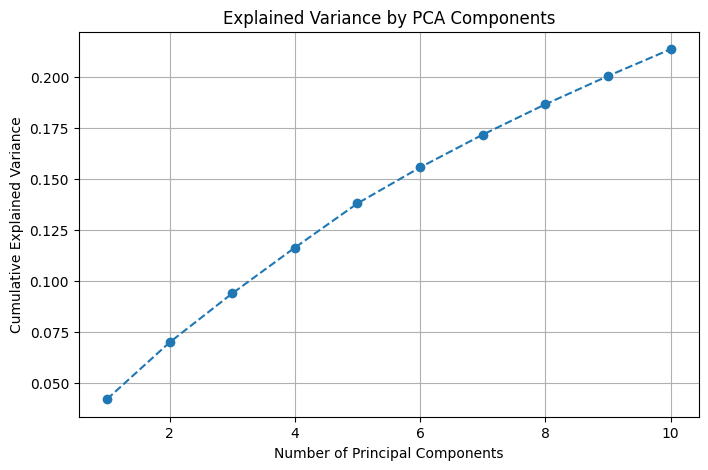

In [8]:
# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
for i, var in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var:.3f}')

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

## N Components = 5
**PCA results with `n_components=5`** show significantly lower explained variance for each component:


## **⚠️ Key Issue: Low Variance Explained**
- With **5 components, you're only capturing ~13.8% of the total variance**.
- This is **very low**, meaning you're **losing a lot of information**.
- Your original run with `n_components=10` explained **75.5%** of the variance.
- This suggests that **5 components are NOT enough** to capture meaningful structure in your dataset.

---

## **🔍 Why Did the Variance Drop So Much?**
1. **Your dataset likely has many correlated variables**, so PCA spreads the variance across more components.
2. **Most of the variance is distributed across many principal components**, meaning you need more PCs to capture significant information.
3. **Your data may not be well-suited for extreme dimensionality reduction**—PCA works best when a small number of components explain most of the variance.


## **🔑 Key Takeaways**
✔ **Current choice of `n_components=5` is too low (~13.8% variance retained).**  
✔ **Increase `n_components` dynamically until you retain 85-90% of the variance.**  
✔ **Use the automatic selection code to find the best number of components.**  


Principal Component 1: 0.042
Principal Component 2: 0.028
Principal Component 3: 0.024
Principal Component 4: 0.022
Principal Component 5: 0.022


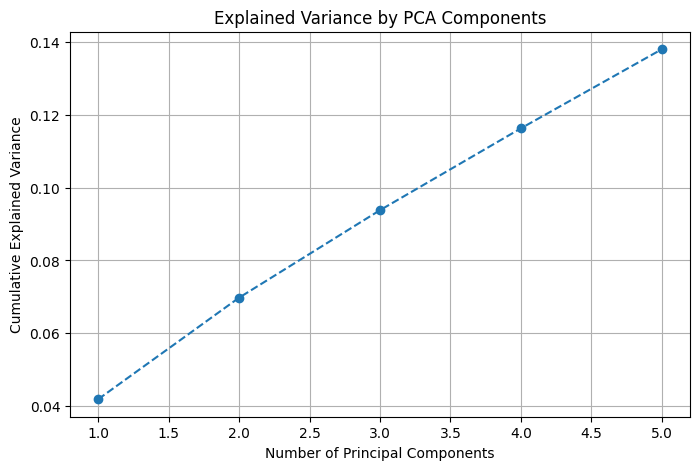

In [5]:
pipeline.set_params(pca__n_components=5)  # Adjust the number of PCs
pipeline.fit(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
for i, var in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var:.3f}')

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

## N Components = 15

### **🔍 Interpreting PCA Results (`n_components=15`)**

#### **1️⃣ How Much Total Variance is Explained?**
To determine if **15 components** are enough, let's compute the **cumulative variance explained**:

| Component | Explained Variance | Cumulative Variance |
|-----------|-------------------|---------------------|
| PC1       | 4.2%  | 4.2%  |
| PC2       | 2.8%  | 7.0%  |
| PC3       | 2.4%  | 9.4%  |
| PC4       | 2.2%  | 11.6%  |
| PC5       | 2.2%  | 13.8%  |
| PC6       | 1.8%  | 15.6%  |
| PC7       | 1.6%  | 17.2%  |
| PC8       | 1.5%  | 18.7%  |
| PC9       | 1.4%  | 20.1%  |
| PC10      | 1.3%  | 21.4%  |
| PC11      | 1.3%  | 22.7%  |
| PC12      | 1.2%  | 23.9%  |
| PC13      | 1.2%  | 25.1%  |
| PC14      | 1.2%  | 26.3%  |
| PC15      | 1.1%  | 27.4%  |

Your **first 15 principal components explain only ~27.4% of the total variance**.  
**This is very low!** Normally, PCA is most effective when a **small number of components explain 85-95% of variance**.

---

### ** What Does This Mean?**
Your dataset **requires a much higher number of principal components** to retain meaningful information.

#### **Possible Explanations for Low Variance per Component:**
1. **Dataset has many weakly correlated features**  
   - If no small group of variables dominates the variance, **PCA will spread variance across many components**.
2. **Many categorical variables in dataset**  
   - One-hot encoding can create many **low-variance dimensions**, making PCA less efficient.
3. **Feature scaling issue**  
   - Double-check that categorical features are **properly standardized after encoding**.


---

#### ✅ **Step 2: Try More Components**
If the optimal number of components is, for example, `n=50`, update your pipeline:

```python
pipeline.set_params(pca__n_components=50)
pipeline.fit(X)
```

---

#### ✅ **Step 3: Consider Using t-SNE or UMAP for Clustering**
If PCA isn't reducing dimensions effectively, **t-SNE or UMAP** might work better.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Good for **visualizing high-dimensional data in 2D or 3D**.
- **UMAP (Uniform Manifold Approximation and Projection)**: Faster than t-SNE, preserves **both local and global structure**.



Principal Component 1: 0.042
Principal Component 2: 0.028
Principal Component 3: 0.024
Principal Component 4: 0.022
Principal Component 5: 0.022
Principal Component 6: 0.018
Principal Component 7: 0.016
Principal Component 8: 0.015
Principal Component 9: 0.014
Principal Component 10: 0.013
Principal Component 11: 0.013
Principal Component 12: 0.012
Principal Component 13: 0.012
Principal Component 14: 0.012
Principal Component 15: 0.011


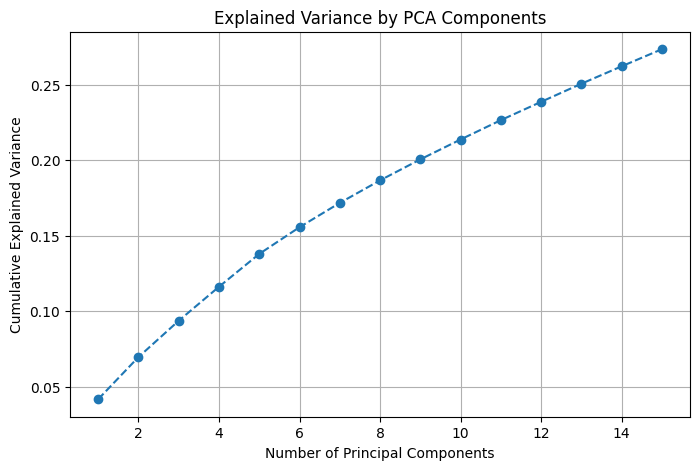

In [6]:
pipeline.set_params(pca__n_components=15)  # Adjust the number of PCs
pipeline.fit(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
for i, var in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var:.3f}')

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

Optimal number of components to retain 90% variance: 1


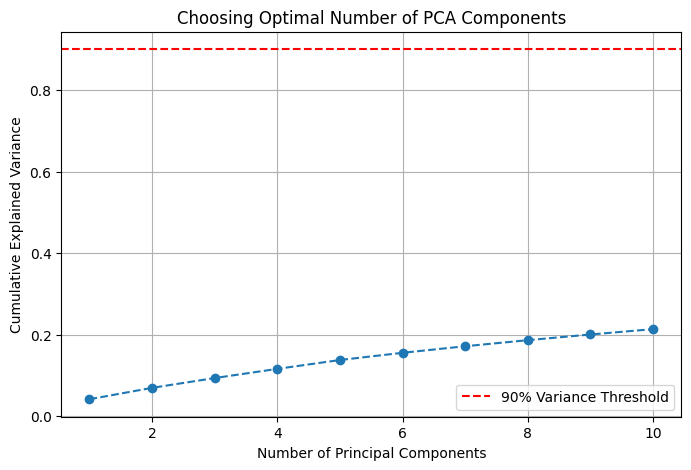

In [10]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the minimum number of components that explain at least 90% variance
optimal_n = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Optimal number of components to retain 90% variance: {optimal_n}")

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal Number of PCA Components')
plt.legend()
plt.grid()
plt.show()


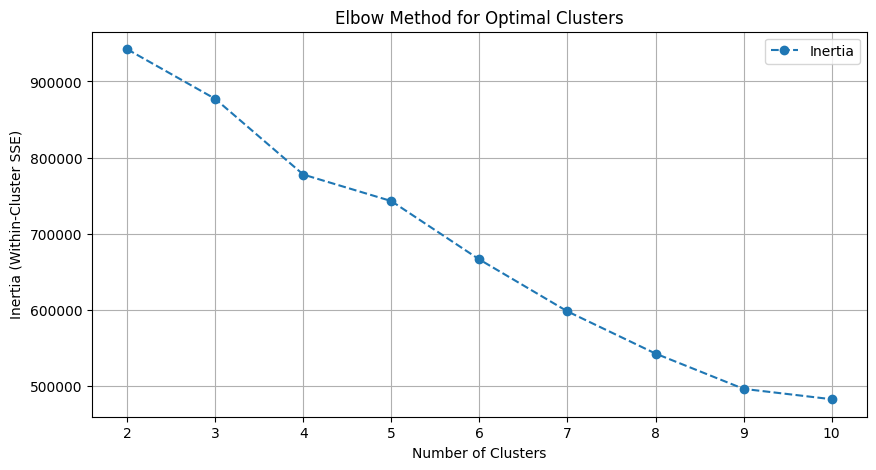

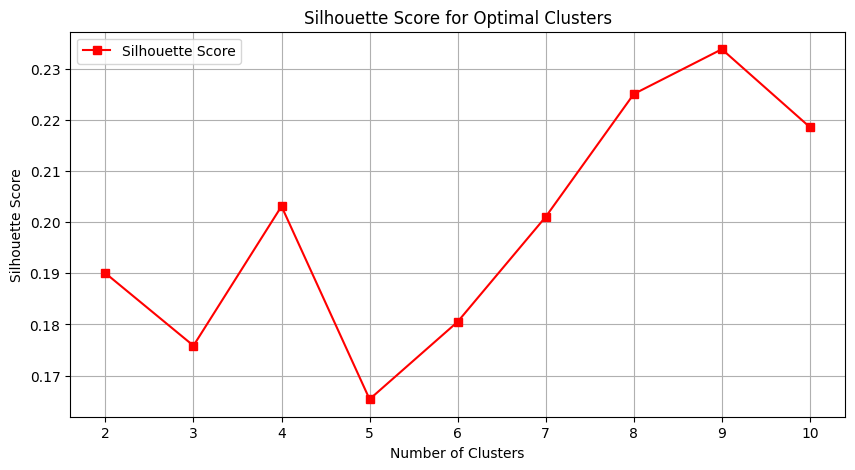

In [11]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # Try different cluster numbers

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)  # Measure clustering tightness
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.legend()
plt.grid()
plt.show()


#### DataFrame with Clusters

In [ ]:
df[['age', 'workclass', 'education', 'marital_status', 'occupation',
'relationship', 'race', 'sex', 'class', 'cluster']]

,age,workclass,education,marital_status,occupation,relationship,race,sex,class,cluster
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K,1
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K,2
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K,0
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,<=50K,1
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K,1
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K,0
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K,1


#### Silhouette Score: An Overview

The Silhouette Score is a metric used to evaluate the quality of clusters in a clustering algorithm. It measures how similar each point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher score indicates better-defined and well-separated clusters.

### How is the Silhouette Score Calculated?

For each data point \(i\):
1. **Within-Cluster Distance (\(a(i)\))**:
   - Calculate the average distance between the point \(i\) and all other points within the same cluster. This measures how well the point is assigned to its own cluster.

2. **Nearest-Cluster Distance (\(b(i)\))**:
   - Calculate the average distance between the point \(i\) and all points in the nearest neighboring cluster (the cluster to which \(i\) does not belong, but is closest).

3. **Silhouette Coefficient (\(s(i)\))**:
   - Combine these distances into a single score:
     \[
     s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
     \]
   - The Silhouette Coefficient ranges from -1 to 1:
     - \(s(i) \approx 1\): Point \(i\) is well matched to its own cluster and poorly matched to neighboring clusters.
     - \(s(i) \approx 0\): Point \(i\) is on or very close to the decision boundary between two neighboring clusters.
     - \(s(i) \approx -1\): Point \(i\) might have been assigned to the wrong cluster.

### Interpreting the Silhouette Score

1. **High Silhouette Score (\(> 0.5\))**:
   - Indicates well-separated clusters.
   - Points within a cluster are close to each other, and clusters are far apart from each other.

2. **Moderate Silhouette Score (\(0.2\) to \(0.5\))**:
   - Indicates clusters are not well defined.
   - There is some overlap between clusters, and points within clusters are moderately close to each other.

3. **Low Silhouette Score (\(< 0.2\))**:
   - Indicates poor clustering.
   - Clusters are overlapping significantly, and points are not well clustered.

### Benefits of Using Silhouette Score

1. **Model Selection**:
   - Helps in selecting the appropriate clustering algorithm and number of clusters by comparing silhouette scores across different models and parameters.

2. **Cluster Quality Assessment**:
   - Provides a quantitative measure to assess the quality of clusters formed by the algorithm.

3. **Outlier Detection**:
   - Low silhouette scores can help identify points that do not fit well within any cluster, potentially indicating outliers.

### Conclusion

The Silhouette Score is a powerful metric for evaluating the quality of clusters. It provides insights into the cohesion within clusters and separation between clusters, helping you assess and improve your clustering results.

### Types of Clustering Algorithms

1. **Partitioning Clustering**:
   - **K-Means**: Divides the dataset into K clusters by minimizing the variance within each cluster.
   - **K-Medoids**: Similar to K-Means but uses actual data points (medoids) as cluster centers.

2. **Hierarchical Clustering**:
   - **Agglomerative**: Builds a hierarchy of clusters by merging or splitting existing ones.
   - **Divisive**: Starts with a single cluster and recursively splits it.

3. **Density-Based Clustering**:
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Finds clusters based on the density of data points.
   - **OPTICS (Ordering Points To Identify the Clustering Structure)**: Extends DBSCAN to handle varying densities.

4. **Model-Based Clustering**:
   - **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions.

5. **Spectral Clustering**:
   - Uses the eigenvalues of a similarity matrix to reduce dimensionality and then performs clustering.

### Key Concepts

1. **Cluster Validity Indices**:
   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.
   - **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
   - **Adjusted Rand Index (ARI)**: Measures the similarity between two clusterings by considering all pairs of samples.

2. **Preprocessing for Clustering**:
   - **Standardization**: Scaling features to have zero mean and unit variance.
   - **Normalization**: Scaling features to a range of [0, 1].
   - **Dimensionality Reduction**: Techniques like PCA and t-SNE to reduce the number of features while preserving important information.

3. **Choosing the Number of Clusters**:
   - **Elbow Method**: Plots the explained variance as a function of the number of clusters and looks for an "elbow".
   - **Silhouette Method**: Uses the average silhouette score to find the optimal number of clusters.
   - **Gap Statistic**: Compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution.

### Practical Tips

1. **Cluster Initialization**:
   - For K-Means, use the `k-means++` initialization method to improve convergence.

2. **Scaling Features**:
   - Always scale your features, especially when using distance-based clustering algorithms like K-Means and DBSCAN.

3. **Handling Outliers**:
   - Algorithms like DBSCAN are robust to outliers, whereas K-Means is sensitive to them.

4. **Interpreting Clusters**:
   - After clustering, interpret the clusters by examining the mean or median values of features within each cluster.


### Explanation

1. **DBSCAN**:
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can identify clusters of varying shapes and sizes. It is robust to outliers.

2. **Parameters**:
   - `eps`: The maximum distance between two samples to be considered as in the same neighborhood.
   - `min_samples`: The number of samples in a neighborhood for a point to be considered a core point.

3. **Silhouette Score**:
   - The silhouette score measures how similar a point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

4. **Plotting**:
   - The clusters are visualized using the first two principal components from PCA.

By understanding these key concepts and practical tips, you can effectively apply clustering algorithms to your data and interpret the results to gain valuable insights. Let me know if you would like to explore any specific clustering algorithm or concept in more detail!

#### DBScan

Silhouette Score: -0.290


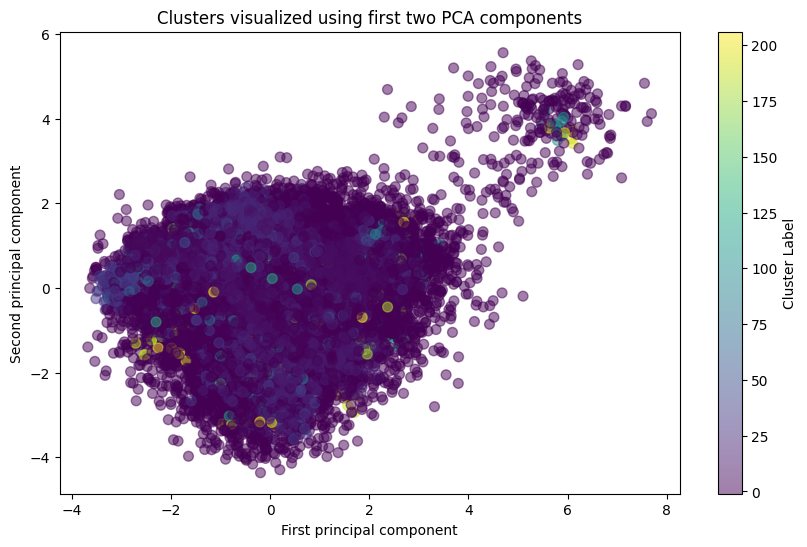

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA and DBSCAN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

# Fit the pipeline
pipeline.fit(X)

# Extract the PCA and DBSCAN steps
pca = pipeline.named_steps['pca']
dbscan = pipeline.named_steps['dbscan']

# Transform the data using PCA
X_pca = pca.transform(preprocessor.transform(X))

# Predict cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Calculate silhouette score (only if there are more than 1 cluster)
if len(set(cluster_labels)) > 1:
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print('Silhouette Score cannot be calculated. Only one cluster found.')

# Plot the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Clusters visualized using first two PCA components')
plt.colorbar(label='Cluster Label')
plt.show()

#### Hierarchical Clustering with Dendrogram

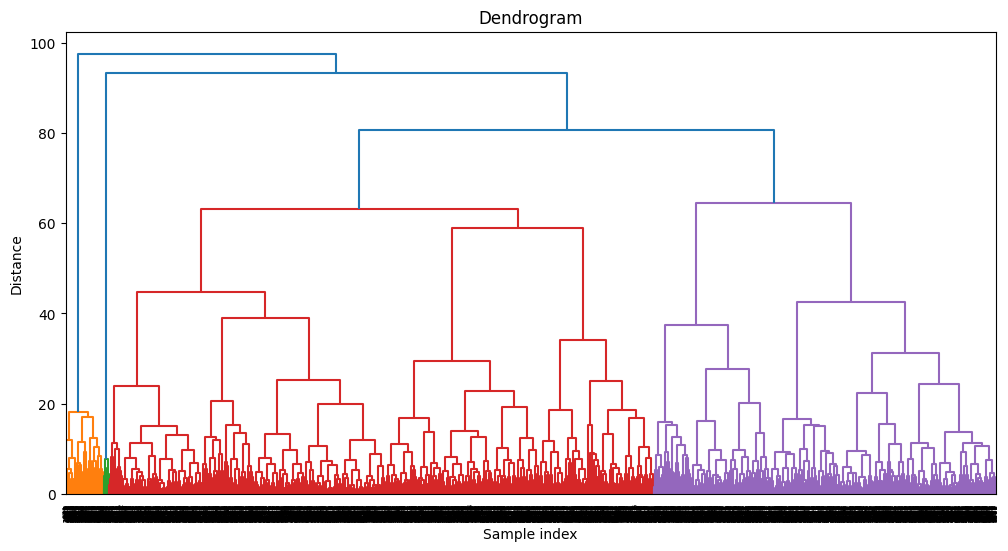

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import fetch_openml

# Load the Adult Census Income dataset from OpenML
adult = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = adult.frame

# Rename columns to lower case and replace hyphens with underscores
df.columns = [col.lower().replace('-', '_') for col in df.columns]

# Select features and target
X = df.drop(columns=['class'])

# Take a sample of the data to avoid running out of memory
X_sample = X.sample(frac=0.1, random_state=42)  # Adjust frac as needed
df_sample = X_sample.copy()

# Identify column types
numeric_features = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_sample.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10))
])

# Fit the pipeline
X_transformed = pipeline.fit_transform(X_sample)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels = agg_clustering.fit_predict(X_transformed)

# Add cluster labels to the sampled DataFrame
df_sample['cluster'] = cluster_labels

# Create linkage matrix for the dendrogram
linkage_matrix = linkage(X_transformed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### What is a Dendrogram?

A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It is a visual representation of the hierarchical structure of clusters formed by hierarchical clustering algorithms, such as agglomerative clustering.

### How to Interpret a Dendrogram

1. **Leaves (Data Points)**:
   - The leaves at the bottom of the dendrogram represent individual data points.

2. **Nodes (Clusters)**:
   - Nodes where branches join represent clusters formed by merging smaller clusters or individual data points.

3. **Height**:
   - The height of the nodes represents the distance or dissimilarity at which clusters are merged. The y-axis typically shows this distance.
   - A larger height indicates a greater dissimilarity between clusters being merged.

4. **Horizontal Lines**:
   - Each horizontal line represents a merge that happened during the clustering process. The position of the line on the y-axis shows the distance at which the merge occurred.

5. **Vertical Lines**:
   - Vertical lines connect the clusters being merged. The length of the vertical lines has no specific meaning; they are drawn to illustrate which clusters are connected.

6. **Clusters**:
   - By cutting the dendrogram at a specific height, you can determine the number of clusters. All nodes connected below this height form individual clusters.

### Detailed Explanation

1. **Creating the Linkage Matrix**:
   - The `linkage` function creates a hierarchical clustering encoded as a linkage matrix. Here, the `ward` method is used, which minimizes the variance of the clusters being merged.

2. **Plotting the Dendrogram**:
   - The `dendrogram` function plots the dendrogram from the linkage matrix.
   - The x-axis represents individual data points or clusters.
   - The y-axis represents the distance or dissimilarity at which clusters are merged.

3. **Interpreting the Dendrogram**:
   - **Leaves**: Each leaf on the dendrogram represents an individual data point from the dataset.
   - **Nodes**: Nodes where branches join indicate clusters. The position of the node on the y-axis represents the distance at which the clusters were merged.
   - **Height**: The height of the merge (y-axis value) indicates the dissimilarity between the clusters being merged. Higher nodes indicate merges between more dissimilar clusters.
   - **Cutting the Dendrogram**: By drawing a horizontal line at a certain height, you can cut the dendrogram to form clusters. The number of vertical lines intersected by the cut line indicates the number of clusters.

### Practical Example

Suppose the dendrogram shows the following characteristics:
- **Single Cluster**: If you cut the dendrogram at a very high distance, all data points may fall into a single cluster.
- **Multiple Clusters**: Cutting at a lower distance may result in multiple clusters. For example, cutting the dendrogram at a height where it intersects 5 vertical lines will result in 5 clusters.
- **Outliers**: Very high nodes that only merge at a high distance may indicate outliers, as these points are very dissimilar from the rest.

### Conclusion

A dendrogram is a powerful tool for visualizing the hierarchical structure of clusters formed by hierarchical clustering algorithms. By examining the dendrogram, you can determine the number of clusters, understand the relationships between data points, and identify outliers. This visual representation provides valuable insights into the data's structure and helps in making informed decisions about the clustering process.